In [1]:
import pandas as pd
import numpy as np
import os

In [9]:
# get all folder names in HistoricalData that doesn't end with zip
folder_names = [x for x in os.listdir('HistoricalData') if not x.endswith('.zip')]
print(folder_names)

['02_08_to_09_08', '10_07_to_17_07', '10_08_to_17_08', '12_06_to_24_06', '18_07_to_25_07', '18_08_to_25_08', '26_07_to_01_08', '26_08_to_02_09', '28_06_to_07_07']


In [22]:
# load all csv files in HistoricalData\[folder_names]\[folder_names] folder
data = pd.DataFrame()
for folder in folder_names:
    print(folder)
    path = r'HistoricalData/' + folder + '/' + folder
    all_files = os.listdir(path)
    all_files = [path + '\\' + file for file in all_files]
    
    for file in all_files:
        # only take the csv files
        if not file.endswith('.csv'):
            continue
        try:
            df = pd.read_csv(file, encoding='utf-8')
            df = df.reset_index(drop=True)
            # only get the data for the two sensors CH:0056.05 and CH:0342.01 in the MSR_Id column
            df = df[df['MSR_Id'].isin(['CH:0056.05', 'CH:0342.01'])]   
            data = pd.concat([data, df])
        except UnicodeDecodeError:
            print(f"Skipping file due to encoding issue: {file}")

data = data.reset_index(drop=True)
print(data.shape)

02_08_to_09_08
10_07_to_17_07
10_08_to_17_08
12_06_to_24_06
18_07_to_25_07
18_08_to_25_08
26_07_to_01_08
26_08_to_02_09
28_06_to_07_07
(209526, 8)


In [23]:
data

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0342.01,2023-08-01T21:59:00.000000Z,180.0,0.0,0.0,138.699997,NaN,NaN
1,CH:0056.05,2023-08-01T21:59:00.000000Z,420.0,0.0,0.0,103.900002,NaN,NaN
2,CH:0342.01,2023-08-01T22:00:00.000000Z,60.0,0.0,0.0,122.000000,NaN,NaN
3,CH:0056.05,2023-08-01T22:00:00.000000Z,660.0,0.0,0.0,100.400002,NaN,NaN
4,CH:0342.01,2023-08-01T22:01:00.000000Z,60.0,0.0,0.0,106.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
209521,CH:0056.05,2023-07-07T08:55:00.000000Z,1440.0,0.0,0.0,100.300003,NaN,NaN
209522,CH:0342.01,2023-07-07T08:56:00.000000Z,1020.0,0.0,0.0,111.800003,NaN,NaN
209523,CH:0056.05,2023-07-07T08:56:00.000000Z,1440.0,0.0,0.0,94.900002,NaN,NaN
209524,CH:0342.01,2023-07-07T08:57:00.000000Z,720.0,0.0,0.0,115.300003,NaN,NaN


In [24]:
# save data as csv file
data.to_csv('two_sensors_data.csv', index=False)

In [25]:
# first sensor
data.loc[data["MSR_Id"]=="CH:0056.05"]

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
1,CH:0056.05,2023-08-01T21:59:00.000000Z,420.0,0.0,0.0,103.900002,NaN,NaN
3,CH:0056.05,2023-08-01T22:00:00.000000Z,660.0,0.0,0.0,100.400002,NaN,NaN
5,CH:0056.05,2023-08-01T22:01:00.000000Z,300.0,0.0,0.0,100.199997,NaN,NaN
7,CH:0056.05,2023-08-01T22:02:00.000000Z,180.0,0.0,0.0,104.300003,NaN,NaN
9,CH:0056.05,2023-08-01T22:03:00.000000Z,180.0,0.0,0.0,103.699997,NaN,NaN
...,...,...,...,...,...,...,...,...
209517,CH:0056.05,2023-07-07T08:53:00.000000Z,1800.0,60.0,0.0,94.000000,82.0,NaN
209519,CH:0056.05,2023-07-07T08:54:00.000000Z,1800.0,120.0,0.0,95.699997,100.5,NaN
209521,CH:0056.05,2023-07-07T08:55:00.000000Z,1440.0,0.0,0.0,100.300003,NaN,NaN
209523,CH:0056.05,2023-07-07T08:56:00.000000Z,1440.0,0.0,0.0,94.900002,NaN,NaN


In [27]:
# find nan values in "CarFlow" and "CarSpeed" in data.loc[data["MSR_Id"]=="CH:0056.05"]
data.loc[data["MSR_Id"]=="CH:0056.05"]["CarFlow"].isna().sum()

807

In [28]:
data.loc[data["MSR_Id"]=="CH:0056.05"]["CarSpeed"].isna().sum()

5935

In [29]:
# load filtered\CH_0056.05_interpolated_v2.csv
sensor_one = pd.read_csv('filtered/CH_0056.05_interpolated_v2.csv', encoding='utf-8')
sensor_one

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0056.05,2023-06-12T18:24:00.000000Z,780.0,0,0,107.699997,0.0,NaN
1,CH:0056.05,2023-06-12T18:25:00.000000Z,780.0,0,0,102.000000,0.0,NaN
2,CH:0056.05,2023-06-12T18:26:00.000000Z,1080.0,0,0,103.599998,0.0,NaN
3,CH:0056.05,2023-06-12T18:27:00.000000Z,600.0,0,0,102.099998,0.0,NaN
4,CH:0056.05,2023-06-12T18:28:00.000000Z,660.0,0,0,99.599998,0.0,NaN
...,...,...,...,...,...,...,...,...
104758,CH:0056.05,2023-09-02T21:53:00.000000Z,840.0,0,0,98.400002,0.0,NaN
104759,CH:0056.05,2023-09-02T21:54:00.000000Z,960.0,0,0,97.300003,0.0,NaN
104760,CH:0056.05,2023-09-02T21:55:00.000000Z,840.0,0,0,100.400002,0.0,NaN
104761,CH:0056.05,2023-09-02T21:56:00.000000Z,540.0,0,0,102.300003,0.0,NaN


In [30]:
# load filtered\CH_0342.01_interpolated_v2.csv
sensor_two = pd.read_csv('filtered/CH_0342.01_interpolated_v2.csv', encoding='utf-8')
sensor_two

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0342.01,2023-06-12T18:24:00.000000Z,180.0,0.0,0.0,119.000000,0.0,NaN
1,CH:0342.01,2023-06-12T18:25:00.000000Z,360.0,0.0,0.0,117.699997,0.0,NaN
2,CH:0342.01,2023-06-12T18:26:00.000000Z,420.0,0.0,0.0,129.699997,0.0,NaN
3,CH:0342.01,2023-06-12T18:27:00.000000Z,360.0,0.0,0.0,122.300003,0.0,NaN
4,CH:0342.01,2023-06-12T18:28:00.000000Z,300.0,0.0,0.0,123.599998,0.0,NaN
...,...,...,...,...,...,...,...,...
104758,CH:0342.01,2023-09-02T21:53:00.000000Z,300.0,0.0,0.0,119.800003,0.0,110.0
104759,CH:0342.01,2023-09-02T21:54:00.000000Z,240.0,0.0,0.0,123.000000,0.0,110.0
104760,CH:0342.01,2023-09-02T21:55:00.000000Z,360.0,0.0,0.0,124.000000,0.0,110.0
104761,CH:0342.01,2023-09-02T21:56:00.000000Z,240.0,0.0,0.0,120.000000,0.0,110.0


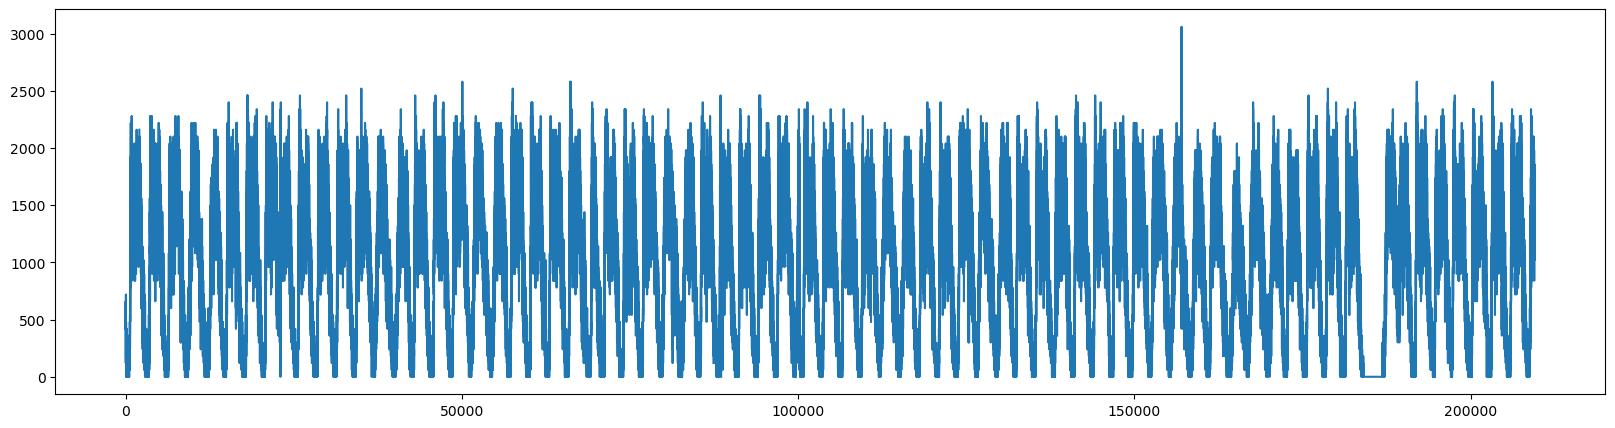

In [26]:
# visualize the time series data of the first sensor
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(data.loc[data["MSR_Id"]=="CH:0056.05"]["CarFlow"])
plt.show()

In [4]:
# second sensor
df.loc[df["MSR_Id"]=="CH:0342.01"]

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
258,CH:0342.01,2023-08-01T21:59:00.000000Z,180.0,0.0,0.0,138.699997,NaN,NaN
2050,CH:0342.01,2023-08-01T22:00:00.000000Z,60.0,0.0,0.0,122.000000,NaN,NaN
3842,CH:0342.01,2023-08-01T22:01:00.000000Z,60.0,0.0,0.0,106.000000,NaN,NaN
5634,CH:0342.01,2023-08-01T22:02:00.000000Z,120.0,0.0,0.0,130.000000,NaN,NaN
7426,CH:0342.01,2023-08-01T22:03:00.000000Z,120.0,0.0,0.0,117.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
20626178,CH:0342.01,2023-08-09T21:54:00.000000Z,60.0,0.0,0.0,135.000000,NaN,NaN
20627970,CH:0342.01,2023-08-09T21:55:00.000000Z,0.0,0.0,0.0,NaN,NaN,NaN
20629762,CH:0342.01,2023-08-09T21:56:00.000000Z,0.0,0.0,0.0,NaN,NaN,NaN
20631554,CH:0342.01,2023-08-09T21:57:00.000000Z,60.0,0.0,0.0,118.000000,NaN,NaN


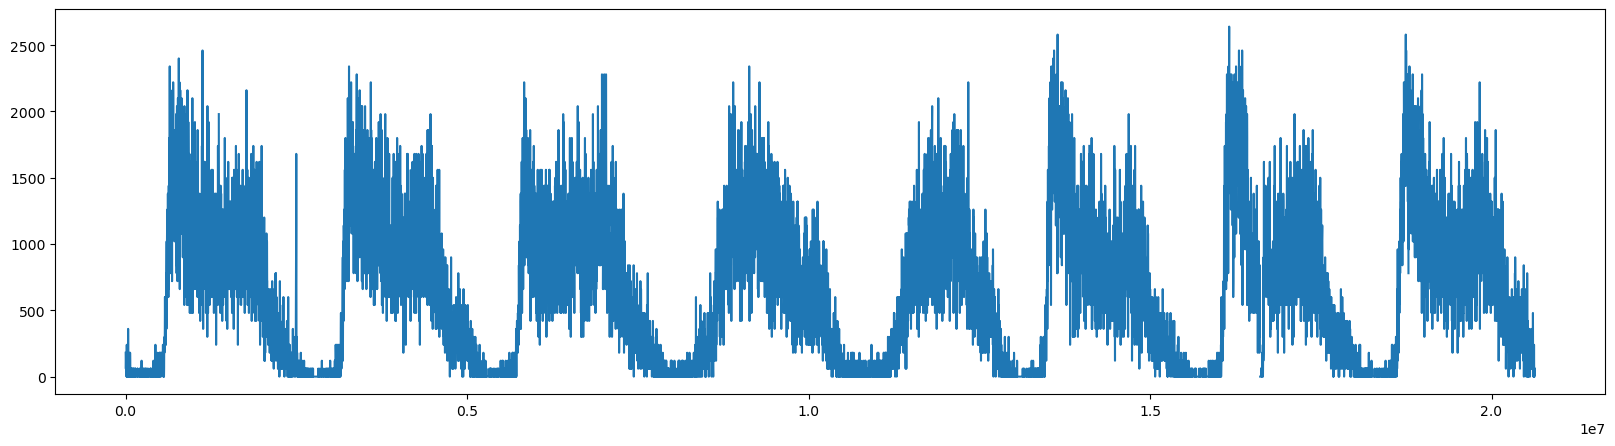

In [7]:
# visualize the time series data of the first sensor
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df.loc[df["MSR_Id"]=="CH:0342.01"]["CarFlow"])
plt.show()

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

In [32]:
# split the first sensor data into train, test, and val set with sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(sensor_one, test_size=0.1, shuffle=False)
train, val = train_test_split(train, test_size=0.1, shuffle=False)
print(train.shape)
print(test.shape)
print(val.shape)

(84857, 8)
(10477, 8)
(9429, 8)


In [33]:
# FFNN model to predict the CarFlow of the first sensor
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [34]:
# train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_loss_list = []
    val_loss_list = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for i, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for i, (inputs, targets) in enumerate(val_loader):
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_loss_list.append(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}')
    return train_loss_list, val_loss_list

In [35]:
# test the model
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(test_loader):
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    print(f'Test loss: {test_loss:.4f}')

In [37]:
train.values

array([['CH:0056.05', '2023-06-12T18:24:00.000000Z', 780.0, ...,
        107.699997, 0.0, nan],
       ['CH:0056.05', '2023-06-12T18:25:00.000000Z', 780.0, ..., 102.0,
        0.0, nan],
       ['CH:0056.05', '2023-06-12T18:26:00.000000Z', 1080.0, ...,
        103.599998, 0.0, nan],
       ...,
       ['CH:0056.05', '2023-08-20T01:49:00.000000Z', 180.0, ..., 104.0,
        0.0, nan],
       ['CH:0056.05', '2023-08-20T01:50:00.000000Z', 180.0, ..., 101.0,
        0.0, nan],
       ['CH:0056.05', '2023-08-20T01:51:00.000000Z', 420.0, ...,
        98.5999985, 0.0, nan]], dtype=object)